In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('marvel-wikia-data.csv')
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [4]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 16376


In [5]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [6]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [7]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((16376, 13), (16376, 3))

In [8]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((16376, 13), (58, 13))

In [9]:
# удалить все объекты, которые содержат значения NaN 
data_new_3 = data.dropna()
(data.shape, data_new_2.shape)

((16376, 13), (58, 13))

In [10]:
num_columns = []
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if null_count > 0 and (dt=='float64' or dt=='int64'):
        num_columns.append(col)
        percent = round(null_count / data[col].shape[0] * 100)
        print('столбец {}, пустых значений:{}, {}% '.format(col, null_count, percent))

столбец APPEARANCES, пустых значений:1096, 7% 
столбец Year, пустых значений:815, 5% 


In [14]:
# Фильтр по пустым значениям поля APPEARANCES
data[data['APPEARANCES'].isnull()].head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
15280,743309,Minister of Castile D'or (Earth-616),\/Minister_of_Castile_D%27or_(Earth-616),No Dual Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Deceased Characters,NaN,Dec-39,1939.0
15281,645438,Mr. Harris' Secretary (Earth-616),\/Mr._Harris%27_Secretary_(Earth-616),No Dual Identity,Neutral Characters,NaN,Blond Hair,Female Characters,NaN,Living Characters,NaN,Oct-39,1939.0
15282,331151,N'Jaga (Earth-616),\/N%27Jaga_(Earth-616),No Dual Identity,Bad Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,Oct-39,1939.0
15283,505986,Ertve (Earth-616),\/Ertve_(Earth-616),Secret Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,NaN,Feb-40,1940.0
15284,19657,Invisible Man (Gade) (Earth-616),\/Invisible_Man_(Gade)_(Earth-616),Secret Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,Apr-40,1940.0


In [13]:
#номера строк с пропущенными значениями APPEARANCES
flt_index = data[data['APPEARANCES'].isnull()].index
flt_index

Int64Index([15280, 15281, 15282, 15283, 15284, 15285, 15286, 15287, 15288,
            15289,
            ...
            16366, 16367, 16368, 16369, 16370, 16371, 16372, 16373, 16374,
            16375],
           dtype='int64', length=1096)

In [19]:
data_num = data[num_columns]
data_num

,APPEARANCES,Year
0,4043.0,1962.0
1,3360.0,1941.0
2,3061.0,1974.0
3,2961.0,1963.0
4,2258.0,1950.0
...,...,...
16371,NaN,NaN
16372,NaN,NaN
16373,NaN,NaN
16374,NaN,NaN


In [20]:
data_num[data_num.index.isin(flt_index)]['APPEARANCES']

15280   NaN
15281   NaN
15282   NaN
15283   NaN
15284   NaN
         ..
16371   NaN
16372   NaN
16373   NaN
16374   NaN
16375   NaN
Name: APPEARANCES, Length: 1096, dtype: float64

In [21]:
data_num_appear = data_num[['APPEARANCES']]
data_num_appear

,APPEARANCES
0,4043.0
1,3360.0
2,3061.0
3,2961.0
4,2258.0
...,...
16371,NaN
16372,NaN
16373,NaN
16374,NaN


In [16]:
# Заполнение пропусков в числовых данных
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [22]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_appear)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [23]:
strategies=['mean', 'median','most_frequent']

def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_appear)
    return data_num_imp[mask_missing_values_only]

In [24]:
strategies[0], test_num_impute(strategies[0])


('mean',
 array([17.03337696, 17.03337696, 17.03337696, ..., 17.03337696,
        17.03337696, 17.03337696]))

In [25]:
strategies[1], test_num_impute(strategies[1])

('median', array([3., 3., 3., ..., 3., 3., 3.]))

In [26]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([1., 1., 1., ..., 1., 1., 1.]))

In [27]:
# Заполнение пропусков в категориальных данных
cat_cols = []
total_count = data.shape[0]
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3770, 23.02%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2812, 17.17%.
Колонка EYE. Тип данных object. Количество пустых значений 9767, 59.64%.
Колонка HAIR. Тип данных object. Количество пустых значений 4264, 26.04%.
Колонка SEX. Тип данных object. Количество пустых значений 854, 5.21%.
Колонка GSM. Тип данных object. Количество пустых значений 16286, 99.45%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.02%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 4.98%.


In [31]:
#столбец ALIVE
cat_data1 = data[['ALIVE']]

# Импьютация наиболее частыми значениями
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp1 = imp1.fit_transform(cat_data1)
data_imp1

array([['Living Characters'],
       ['Living Characters'],
       ['Living Characters'],
       ...,
       ['Living Characters'],
       ['Living Characters'],
       ['Living Characters']], dtype=object)

# Кодирование категорий целочисленными значениями 

In [32]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_enc = pd.DataFrame({'align1' : data_imp1.T[0]})
cat_le = le.fit_transform(cat_enc['align1'])

cat_enc['align1'].unique()

array(['Living Characters', 'Deceased Characters'], dtype=object)

In [33]:
np.unique(cat_le)

array([0, 1])

#  Кодирование категорий наборами бинарных значений

In [34]:
cat_data2 = data[['ALIGN']]
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_data2)
data_imp2

array([['Good Characters'],
       ['Good Characters'],
       ['Neutral Characters'],
       ...,
       ['Bad Characters'],
       ['Neutral Characters'],
       ['Bad Characters']], dtype=object)

In [35]:
cat_enc2 = pd.DataFrame({'align1':data_imp2.T[0]})
cat_enc2

,align1
0,Good Characters
1,Good Characters
2,Neutral Characters
3,Good Characters
4,Good Characters
...,...
16371,Bad Characters
16372,Good Characters
16373,Bad Characters
16374,Neutral Characters


In [38]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc2[['align1']])
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.]])

# Закодированная таблица без пропусков

In [39]:
encode = LabelEncoder()
features = data.iloc[:,:].values

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(features[:,:])
features[:,:] = imputer.fit_transform(features[:,:])
features[:,9] = encode.fit_transform(features[:,9])
features[:,3] = encode.fit_transform(features[:,3])
features[:,4] = encode.fit_transform(features[:,4])
features[:,5] = encode.fit_transform(features[:,5])
features[:,6] = encode.fit_transform(features[:,6])
features[:,7] = encode.fit_transform(features[:,7])
features[:,8] = encode.fit_transform(features[:,8])
df1 = pd.DataFrame(features, columns = ['page_id','name','urlslug','ID','ALIGN','EYE','HAIR','SEX','GSM','ALIVE','APPEARANCES','FIRST APPEARANCE','Year'])
df1.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),3,1,9,6,3,2,1,4043,Aug-62,1962
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),2,1,3,23,3,2,1,3360,Mar-41,1941
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),2,2,3,2,3,2,1,3061,Oct-74,1974
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),2,1,3,2,3,2,1,2961,Mar-63,1963
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),1,1,3,3,3,2,1,2258,Nov-50,1950


# MinMax Масштабирование данных

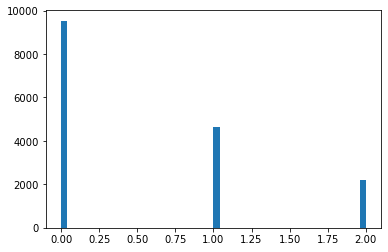

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df1[['ALIGN']])
plt.hist(df1['ALIGN'], 50)
plt.show()

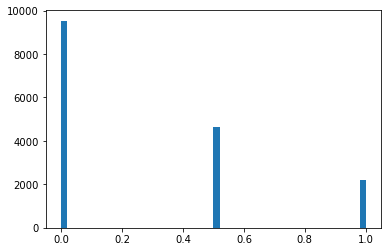

In [41]:
plt.hist(sc1_data, 50)
plt.show()


# Масштабирование данных на основе Z-оценки - StandardScaler

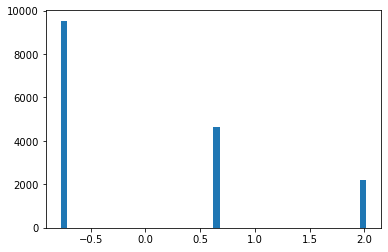

In [42]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(df1[['ALIGN']])
plt.hist(sc2_data, 50)
plt.show()

# Нормализация данных

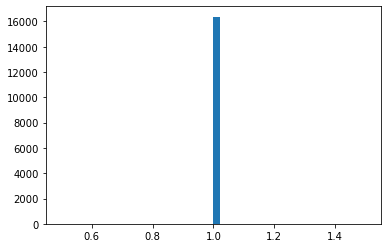

In [43]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(df1[['APPEARANCES']])
plt.hist(sc3_data, 50)
plt.show()